# Getting the data.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test.zip



import os
import zipfile
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# --------------------------
# Storing and extracting the data.
# --------------------------
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/tmp/rps-test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# --------------------------
# Creating Rock, Paper and Scissors directories.
#---------------------------
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissor_dir = os.path.join('/tmp/rps/scissors')

print("Total training rock images:", len(os.listdir(rock_dir)))
print("Total training paper images:", len(os.listdir(paper_dir)))
print("Total training scissor images:", len(os.listdir(scissor_dir)))

# --------------------------
# Pre -processing the images.
# --------------------------
TRAINING_DIR = '/tmp/rps/'

train_datagen = ImageDataGenerator(
                                   rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
                                                    TRAINING_DIR,
                                                    target_size = (150, 150),
                                                    class_mode = 'categorical',
                                                    batch_size = 126)

                                  

VALIDATION_DIR = '/tmp/rps-test-set/'

validation_datagen = ImageDataGenerator(
                                        rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
                                                              VALIDATION_DIR,
                                                              target_size = (150, 150),
                                                              class_mode = 'categorical',
                                                              batch_size = 126)

# ---------------------------
# Designing the Model
# ---------------------------

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
                                    ])

model.summary()               # To check the summary of Model.


# --------------------------
# Compiling and fitting the Model.
# --------------------------
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    steps_per_epoch = 20,
                    epochs = 5,
                    verbose = 1,
                    validation_steps = 3
                    )


--2020-06-07 12:46:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   232MB/s    in 0.8s    

2020-06-07 12:46:31 (232 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-06-07 12:46:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test.zip’

/tmp/rps-t

# Plotting accuracy and losses per epoch.

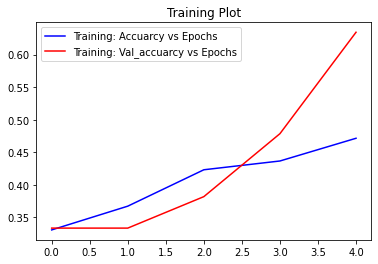

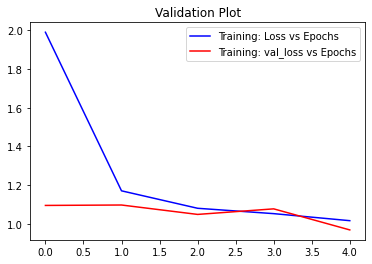

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = "Training: Accuarcy vs Epochs")
plt.plot(epochs, val_acc, 'r', label = "Training: Val_accuarcy vs Epochs")
plt.title("Training Plot")
plt.legend(loc = 0)
plt.figure()

plt.plot(epochs, loss, 'b', label = "Training: Loss vs Epochs")
plt.plot(epochs, val_loss, 'r', label = "Training: val_loss vs Epochs")
plt.title("Validation Plot")
plt.legend(loc = 0)
plt.figure()

plt.show()

# Prediction of New Images

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting Images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  print(classes)


Using TensorFlow backend.
